WDBC EDA and Logistic Regression Classifier
===

## Overview

In this notebook, we perform a smll exploratory data analysis on the Winsconsin Diagnostic Breast Cancer dataset, and then we use the said dataset for logistic regression classification.

First we input the dataset and some libraries we can use for visualization.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

Let us now load the dataset as a data frame for easier statistical analysis.

In [2]:
wdbc = load_breast_cancer(as_frame=True)

Let us check the contents of the loaded data

In [3]:
wdbc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

Display the dataset description

In [4]:
print(wdbc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Let us inspect the data frame.

In [5]:
df = wdbc.frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Let us see some of the satistical properties of our dataset.

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


From this description we can see that the ranges ofvalues for each feature are quite different and large. For instance, the `mean area` has a maximum value of 2501 while the `mean fractal dimension` has a maximum value of 0.097440. We can also see from their standard deviation that some of the features have higher standard deviation than the others. This may form an improper assignment of importance on the features, i.e. features with higher standard deviation might be improperly deemed as more important than others.

To remedy this, we can perform a prepocessiong step of normalization using either mean-max scaling (i.e. scaling the values to [0, 1] range) or standardization (i.e. subtraction of mean and division by standard deviation for the features.)

$$ \hat{x} = \dfrac{x - min(x)}{\max(x) - \min(x)} $$

The above equation is the min-max scaling.

$$\hat{x} = \dfrac{x - \mu}{\sigma} $$

The above equation is the standardization where $\mu$ is the mean of x and $\sigma$ is the standard deviation of x.

Let us perform min-max scaling and store the results.

In [7]:
normalized_features = wdbc.data.apply(lambda x: (x - min(x)) / (max(x)) - min(x))

Let us perform standardization and store the results.

In [8]:
standardized_features = wdbc.data.apply(lambda x: (x - x.mean()) / x.std())

Let us now inspect the normalized features.

In [9]:
normalized_features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,-6.726774,-9.466119,-43.534408,-143.295526,0.214997,0.226599,0.208058,0.243137,0.141243,0.081789,...,-7.698613,-11.744319,-50.183681,-185.036534,0.203756,0.187242,0.217403,0.393836,0.044729,0.084265
std,0.125366,0.109497,0.128907,0.140709,0.086072,0.152903,0.186785,0.192857,0.090179,0.072459,...,0.134108,0.124067,0.133768,0.133840,0.102572,0.148711,0.166633,0.225884,0.093202,0.087042
min,-6.981000,-9.710000,-43.790000,-143.500000,-0.052630,-0.019380,0.000000,0.000000,-0.106000,-0.049960,...,-7.930000,-12.020000,-50.410000,-185.200000,-0.071170,-0.027290,0.000000,0.000000,-0.156500,-0.055040
25%,-6.813124,-9.545540,-43.623528,-143.389324,0.153857,0.112467,0.069260,0.100944,0.077882,0.029473,...,-7.789046,-11.837117,-50.275844,-185.122402,0.132918,0.086046,0.091454,0.223127,-0.015042,0.024093
50%,-6.753714,-9.477566,-43.564801,-143.337025,0.211997,0.192693,0.144189,0.166501,0.134789,0.068882,...,-7.734661,-11.749713,-50.221903,-185.082158,0.198956,0.147200,0.181070,0.343402,0.032864,0.065442
75%,-6.667980,-9.402210,-43.470053,-143.244422,0.269708,0.302044,0.306232,0.367793,0.189066,0.115886,...,-7.628668,-11.662713,-50.111473,-184.988717,0.264994,0.267426,0.305831,0.554639,0.086646,0.123466
max,-6.229346,-8.957200,-43.022308,-142.557377,0.625277,0.924511,1.000000,1.000000,0.545316,0.437314,...,-7.150033,-11.262632,-49.610677,-184.243535,0.609109,0.946916,1.000000,1.000000,0.607736,0.679707


In [10]:
standardized_features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.311195e-16,6.243785e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.998011e-16,3.746271e-17,-4.995028e-17,1.748260e-16,4.838933e-16,...,-8.241796e-16,1.248757e-17,-3.496520e-16,0.000000,-2.122887e-16,-3.621395e-16,8.741299e-17,2.122887e-16,2.622390e-16,-5.744282e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027864e+00,-2.227289e+00,-1.982759e+00,-1.453164e+00,-3.109349e+00,-1.608721e+00,-1.113893e+00,-1.260710e+00,-2.741705e+00,-1.818265e+00,...,-1.725382e+00,-2.222039e+00,-1.691872e+00,-1.221348,-2.680337e+00,-1.442609e+00,-1.304683e+00,-1.743529e+00,-2.159060e+00,-1.600431e+00
25%,-6.887793e-01,-7.253249e-01,-6.913472e-01,-6.666089e-01,-7.103378e-01,-7.464292e-01,-7.430941e-01,-7.372951e-01,-7.026215e-01,-7.220040e-01,...,-6.743279e-01,-7.479711e-01,-6.889721e-01,-0.641571,-6.906227e-01,-6.804845e-01,-7.558491e-01,-7.557349e-01,-6.412994e-01,-6.913035e-01
50%,-2.148925e-01,-1.045442e-01,-2.357726e-01,-2.949274e-01,-3.486040e-02,-2.217454e-01,-3.419391e-01,-3.973715e-01,-7.156354e-02,-1.781226e-01,...,-2.688030e-01,-4.347738e-02,-2.857288e-01,-0.340881,-4.680159e-02,-2.692639e-01,-2.180402e-01,-2.232725e-01,-1.272975e-01,-2.162538e-01
75%,4.689800e-01,5.836621e-01,4.992377e-01,3.631877e-01,6.356397e-01,4.934227e-01,5.255994e-01,6.463664e-01,5.303125e-01,4.705693e-01,...,5.215568e-01,6.577623e-01,5.398040e-01,0.357275,5.970195e-01,5.391944e-01,5.306742e-01,7.118836e-01,4.497425e-01,4.503661e-01
max,3.967796e+00,4.647799e+00,3.972634e+00,5.245913e+00,4.766717e+00,4.564409e+00,4.239858e+00,3.924477e+00,4.480808e+00,4.906602e+00,...,4.090590e+00,3.882489e+00,4.283568e+00,5.924959,3.951897e+00,5.108382e+00,4.696536e+00,2.683516e+00,6.040726e+00,6.840837e+00


We, can see from the above results that using min-max scaling the standard deviation forthe features is in close ranges. Meanwhile, using the standardization, the standard deviation became identical -- which can be attributed from the operation of dividing them by their stadard deviation after subtracting their mean.

For now, we set this normalize features aside.

Let us check the frequency distribution of the classes.

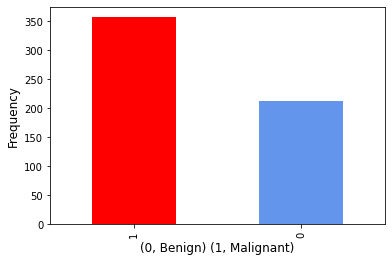

In [11]:
df.target.value_counts().plot(kind="bar", color=["red", "cornflowerblue"])
plt.xlabel("(0, Benign) (1, Malignant)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

The values are reversed. Supposedly, there are 212 malignant examples and 357 benign examples. We can resolve this by re-mapping the targets.

In [12]:
df.target = df.target.apply(lambda x: 0 if x == 1 else 1)

Let us now inspect the class frequency distribution.

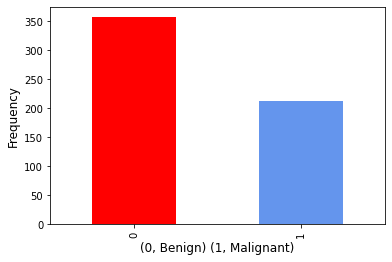

In [13]:
df.target.value_counts().plot(kind="bar", color=["red", "cornflowerblue"])
plt.xlabel("(0, Benign) (1, Malignant)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

We can now see that the mapping of targets has been fixed.

The dataset has an imbalanced class frequency distribution, which can be resolved by either oversampling the minority class data or undersampling. In machine learning, we need more data to reah better results. So, it would not make sense to underssample the majority class ata. Instead, oversampling is preferrable. There are two more popular methods for oversampling: (1) random oversampling where we duplicate existing data of the minority class, and (2) SMOTE or synthetic minority oversampling technique where we synthesize new data using existing data of the minority class. Both oversmapling methods can be done by using the `imblearn` package (install using `pip install imbalanced-learn`).

For now, let us leave the oversampling to later task.

In [14]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


To better inspect the correlation matrix, we can plot a heatmap.

<AxesSubplot:>

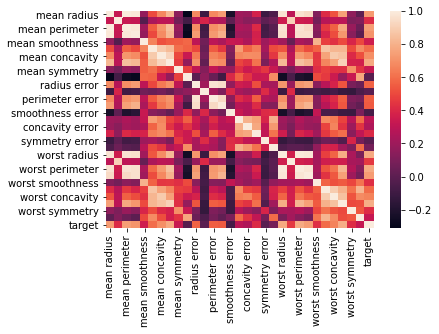

In [15]:
sns.heatmap(df.corr())

<AxesSubplot:>

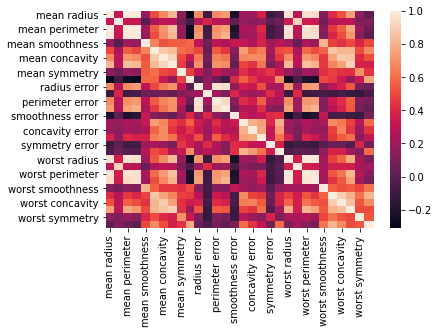

In [16]:
sns.heatmap(standardized_features.corr())

As we can see from our heatmap, there are features with low correlation which may imply that they are relatively less important as predictive variables than ther features. We can then use PCA to select the most salient features of the data.

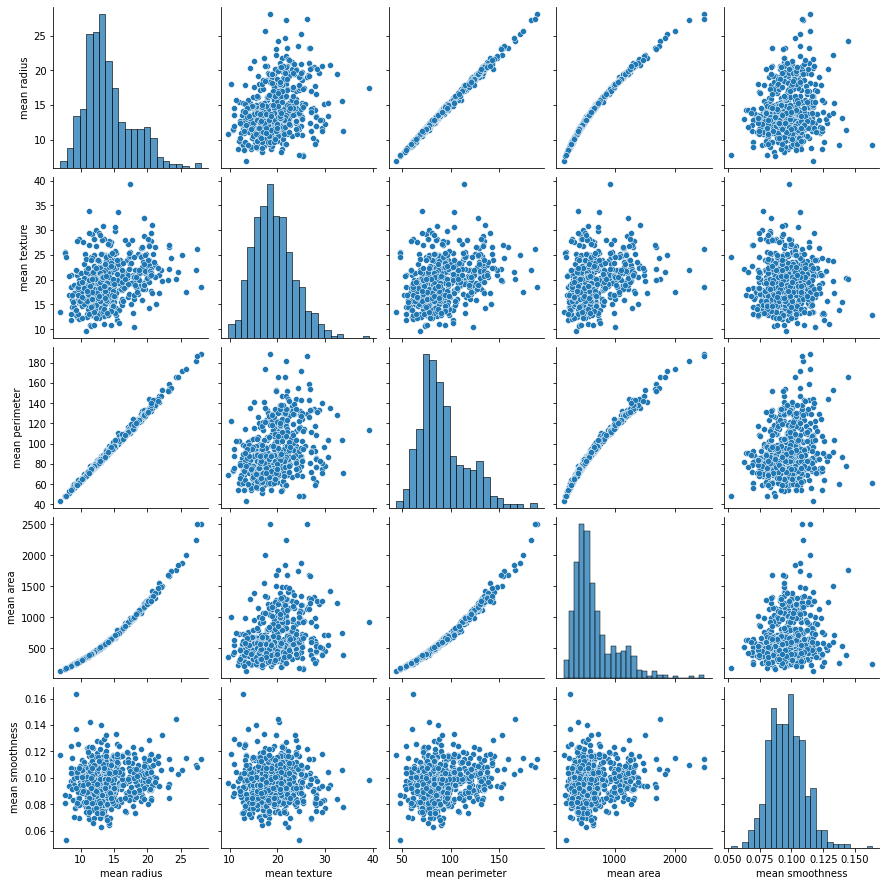

In [17]:
sns.pairplot(wdbc.data.iloc[:, :5])

From the first five pairs of scatter plots, we can't see an easily separable data points. Running the pairplot on all 30 features would take a while, so we only computed the firstfive pairs of the features.

In [18]:
wdbc.data.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

The positive skewness of the datasets since they are all measurements of cells from the breast mass. We can't have a negative measurement.

Now we proceed to the classification of breast cancer data using logistic regression model. We have four configurations to run:
    
    1. Training and evaluation on raw features.
    2. Training and evaluation on min-max features.
    3. Training and evaluation on standardized features.
    4. Training and evaluation on PCA-selected features.

First, we split the dataset.

In [19]:
from sklearn.model_selection import train_test_split

We allocate 70% of the dataset as training set and 30% as test set.

In [20]:
train_features, test_features, train_labels, test_labels = train_test_split(wdbc.data, wdbc.target, test_size=.30, shuffle=True, random_state = 42)

We import logistic regression class.

In [21]:
from sklearn.linear_model import LogisticRegression

We instantiate a model for training and evaluation on raw features.

In [22]:
logreg = LogisticRegression(random_state=42)

Train the model on raw features.

In [23]:
logreg.fit(train_features, train_labels)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

We measure the accuracy of the trained model.

1. The .score() predicts the classes for the test_features.
2. Check how many predictions from step 1 are correct and we do this by comparing them with test_labels.

In [24]:
logreg.score(test_features, test_labels)

0.9707602339181286

We instantiate a model for training and evaluation on min-max scaled features. But first, we scale the train and test sets.

In [25]:
normalized_train_features = train_features.apply(lambda x: (x - min(x)) / (max(x)) - min(x))
normalized_test_features = test_features.apply(lambda x: (x - min(x)) / (max(x)) - min(x))

logreg = LogisticRegression(random_state=42)

Train the model on min-max scaled features.

In [26]:
logreg.fit(normalized_train_features, train_labels)

LogisticRegression(random_state=42)

We measure the accuracy of the trained model.

In [27]:
logreg.score(normalized_test_features, test_labels)

0.631578947368421

We instantiate a model for training and evaluation on standardized features. But first, we stndardize the train and test sets.

In [28]:
standardized_train_features = train_features.apply(lambda x: (x- x.mean()) / (x.std()))
standardized_test_features = test_features.apply(lambda x: (x- x.mean()) / (x.std()))

logreg = LogisticRegression(random_state=42)

Train the model on min-max scaled features.

In [29]:
logreg.fit(standardized_train_features, train_labels)

LogisticRegression(random_state=42)

We measure the accuracy of the trained model.

In [30]:
logreg.score(standardized_test_features, test_labels)

0.9766081871345029